In [4]:
%run IDM_helper_functions.ipynb

In [5]:
from pyddm import Model
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted, Sample
from pyddm.models import LossRobustBIC, LossBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model

In [6]:
import pandas as pd
import os
import scipy.io as sio

In [94]:
directory = "/Users/wangjiashun/Desktop/SAT-Rafiei"
sub = 1
session = 1
file = directory+"/Subject "+str(sub)+"/Session"+str(session)
file

'/Users/wangjiashun/Desktop/SAT-Rafiei/Subject 1/Session1'

In [95]:
data_session_sub = sio.loadmat(file)["p"]

In [101]:
import seaborn as sns


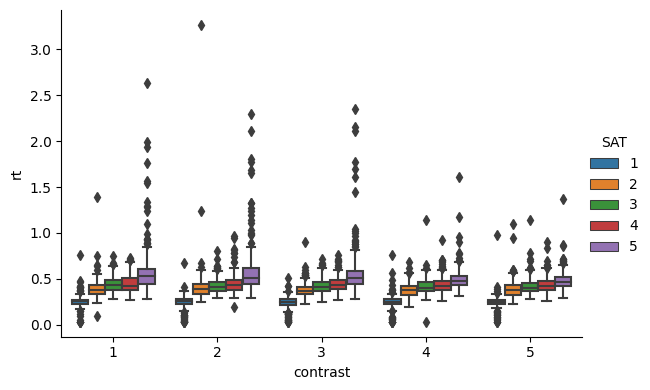

In [113]:
#df_check = df_sub[df_sub.SAT == ]
#df_check = df_sub[df_sub.contrast == 5]

sns.catplot(data=df_sub, x="contrast", y="rt", hue="SAT", kind="box",
            height=4, aspect=6/4)

# Data preprocessing


In [ ]:
for sub in range(30): # over participants

    df_sub = pd.DataFrame(columns = ['contrast', 'SAT', 'rt', 'correct'],)
    for session in range(5): # over session
        file = directory+"/Subject "+str(sub+1)+"/Session"+str(session+1)+'.mat'
        #print(os.path.exists(file))
        if not os.path.exists(file):
            break
        
        data_session_sub = sio.loadmat(file)["p"]

        for i in range(4): # over runs
            for j in range(5): # over blocks
                SAT = [data_session_sub["condition"][0,0][i,j]]*50
                contrast = data_session_sub["data"][0,0][i,j]["contrast"][0,0]
                rt = data_session_sub["data"][0,0][i,j]["rt"][0,0]
                correct = data_session_sub["data"][0,0][i,j]["correct"][0,0]

                df_block = pd.DataFrame({'contrast':contrast[0,:], 
                                         'SAT':np.array(SAT), 
                                         'rt':rt[0,:], 
                                         'correct':correct[0,:]})
                df_sub = df_sub.append(df_block)


    df_sub.to_csv('data_sub'+str(sub+1)+'.csv')


In [135]:
i = 0
path = os.path.join(data_dir+str(i+1)+".csv")
df = pd.read_csv(path)
df

,Unnamed: 0,contrast,SAT,rt,correct
0,0,1,2,0.333174,0
1,1,1,2,0.254905,1
2,2,3,2,0.229423,0
3,3,2,2,0.243612,0
4,4,5,2,0.226315,1
...,...,...,...,...,...
4995,45,1,3,0.279900,0
4996,46,5,3,0.325039,0
4997,47,2,3,0.408336,0
4998,48,4,3,0.438938,1


In [11]:
data_dir = "/Users/wangjiashun/Desktop/SAT-Rafiei/data/data_sub"
df_all = pd.DataFrame(columns = ['contrast', 'SAT', 'participant', 'v','a','ter','k'],)


i=1
for sub in range(20,30):
    for contrast in range(5):
        for SAT in range(5):
            print(i)
            i+=1
    
            path = os.path.join(data_dir+str(sub+1)+".csv")
            df = pd.read_csv(path)
            df = df[df["contrast"]==contrast+1] # one contrast condition
            df = df[df["SAT"]==SAT+1] # # one SAT condition

            data_sub = np.stack((np.array((df["rt"])), np.array((df["correct"]))), axis = 1)
            samp = Sample.from_numpy_array(data_sub, column_names = [])

            model_fit = Model(name='Simple model (fitted)',
                          drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                            t = 0,
                                            x=Fittable(minval=-30, maxval=30)),
                          noise=NoiseConstant(noise=1),
                          bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                          overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                          dx=.001, dt=.001, T_dur=3)

            fit_adjust_model(samp, model_fit,
                             fitting_method="differential_evolution",
                             lossfunction=LossRobustBIC, verbose=False)
            
            df_sub = pd.DataFrame(columns = ['contrast', 'SAT', 'participant', 'v','a','ter','k'],)

            df_sub = pd.DataFrame({'contrast':contrast+1, 
                                   'SAT':SAT+1, 
                                   'participant': sub + 1,
                                   'v': np.array(model_fit.parameters()['drift']['drift']), 
                                   'a': np.array(model_fit.parameters()['bound']['B']),
                                   'ter': np.array(model_fit.parameters()['overlay']['nondectime']),
                                   'k': np.array(model_fit.parameters()['drift']['x'])
                                  }, index=[i])
            
            df_all = df_all.append(df_sub)

            print(df_sub)


1


Info: Params [ 0.27212159 18.83149575  9.85889604  0.15621231] gave -326.9392776009717


   contrast  SAT  participant         v         a       ter          k
2         1    1           21  0.272122  9.858896  0.156212  18.831496
2


Info: Params [ 0.42221278 17.03360228  8.01096969  0.16065982] gave -286.3348150550093


   contrast  SAT  participant         v        a      ter          k
3         1    2           21  0.422213  8.01097  0.16066  17.033602
3


Info: Params [ 0.52142055 14.93907825  3.1909891   0.21286853] gave -230.34942581841273


   contrast  SAT  participant         v         a       ter          k
4         1    3           21  0.521421  3.190989  0.212869  14.939078
4


Info: Params [ 0.60763808 13.57122515  6.94143773  0.15075357] gave -209.48198065206913


   contrast  SAT  participant         v         a       ter          k
5         1    4           21  0.607638  6.941438  0.150754  13.571225
5


Info: Params [ 0.96122615 10.83980144  1.42260099  0.3367738 ] gave -153.6976880603633


   contrast  SAT  participant         v         a       ter          k
6         1    5           21  0.961226  1.422601  0.336774  10.839801
6


Info: Params [ 0.80175314 18.6431011   8.6490776   0.16202294] gave -319.93041774696576


   contrast  SAT  participant         v         a       ter          k
7         2    1           21  0.801753  8.649078  0.162023  18.643101
7


Info: Params [ 0.64428085 17.12165498  8.82276908  0.16005673] gave -289.94556637035606


   contrast  SAT  participant         v         a       ter          k
8         2    2           21  0.644281  8.822769  0.160057  17.121655
8


Info: Params [ 0.99958689 14.62757973  9.34134797  0.13366085] gave -250.40908428289544


   contrast  SAT  participant         v         a       ter         k
9         2    3           21  0.999587  9.341348  0.133661  14.62758
9


Info: Params [ 1.31079871 15.96161419  1.33444905  0.28433281] gave -314.50141352052543


    contrast  SAT  participant         v         a       ter          k
10         2    4           21  1.310799  1.334449  0.284333  15.961614
10


Info: Params [ 1.64867401 10.77079638  1.25158907  0.341114  ] gave -224.04648277472856


    contrast  SAT  participant         v         a       ter          k
11         2    5           21  1.648674  1.251589  0.341114  10.770796
11


Info: Params [ 1.34288766 19.21234406  2.63340657  0.230126  ] gave -376.97365079916244


    contrast  SAT  participant         v         a       ter          k
12         3    1           21  1.342888  2.633407  0.230126  19.212344
12


Info: Params [ 1.73955797 15.93358612  0.60070024  0.30315363] gave -381.6710269516824


    contrast  SAT  participant         v       a       ter          k
13         3    2           21  1.739558  0.6007  0.303154  15.933586
13


Info: Params [ 1.67119018 15.46658316  3.82520101  0.20311708] gave -322.39174372326664


    contrast  SAT  participant        v         a       ter          k
14         3    3           21  1.67119  3.825201  0.203117  15.466583
14


Info: Params [ 1.79303858 16.05024248  3.07400631  0.23794376] gave -335.81037001429377


    contrast  SAT  participant         v         a       ter          k
15         3    4           21  1.793039  3.074006  0.237944  16.050242
15


Info: Params [ 1.79462399 12.2417511   3.16246723  0.27703704] gave -262.7060236233639


    contrast  SAT  participant         v         a       ter          k
16         3    5           21  1.794624  3.162467  0.277037  12.241751
16


Info: Params [ 1.6747647  19.32118952  9.54919497  0.15156476] gave -415.80599648046285


    contrast  SAT  participant         v         a       ter         k
17         4    1           21  1.674765  9.549195  0.151565  19.32119
17


Info: Params [ 2.03457185 17.8419521   6.92113603  0.17955519] gave -402.6444108451064


    contrast  SAT  participant         v         a       ter          k
18         4    2           21  2.034572  6.921136  0.179555  17.841952
18


Info: Params [ 2.48564922 16.54485829  1.45719376  0.27355226] gave -433.5573080236364


    contrast  SAT  participant         v         a       ter          k
19         4    3           21  2.485649  1.457194  0.273552  16.544858
19


Info: Params [ 2.98726833 11.69341208  0.78801806  0.30078422] gave -449.26825824684937


    contrast  SAT  participant         v         a       ter          k
20         4    4           21  2.987268  0.788018  0.300784  11.693412
20


Info: Params [3.57936276 9.42406434 1.35419699 0.32801409] gave -438.4288741771068


    contrast  SAT  participant         v         a       ter         k
21         4    5           21  3.579363  1.354197  0.328014  9.424064
21


Info: Params [ 2.58954333 21.08678659  9.71990796  0.17128761] gave -497.4743885714972


    contrast  SAT  participant         v         a       ter          k
22         5    1           21  2.589543  9.719908  0.171288  21.086787
22


Info: Params [ 3.39658083 13.43945169  0.52214727  0.31036872] gave -551.8913375152661


    contrast  SAT  participant         v         a       ter          k
23         5    2           21  3.396581  0.522147  0.310369  13.439452
23


Info: Params [ 2.5217095  14.18152513  9.90050701  0.12460043] gave -409.57819290646023


    contrast  SAT  participant         v         a     ter          k
24         5    3           21  2.521709  9.900507  0.1246  14.181525
24


Info: Params [ 3.87433297 15.80970654  6.09730347  0.19623657] gave -558.2039048747872


    contrast  SAT  participant         v         a       ter          k
25         5    4           21  3.874333  6.097303  0.196237  15.809707
25


Info: Params [4.55125129 8.80763162 2.24895771 0.28827646] gave -533.759846106094


    contrast  SAT  participant         v         a       ter         k
26         5    5           21  4.551251  2.248958  0.288276  8.807632
26


Info: Params [0.4996957  6.40955957 0.60668973 0.10083458] gave 1531.5423246039975


    contrast  SAT  participant         v        a       ter        k
27         1    1           22  0.499696  0.60669  0.100835  6.40956
27


Info: Params [0.23568874 5.55874971 1.15925736 0.10045672] gave 398.6539508206653


    contrast  SAT  participant         v         a       ter        k
28         1    2           22  0.235689  1.159257  0.100457  5.55875
28


Info: Params [0.44085174 6.98847697 3.48680421 0.10048308] gave 1.8151004346706436


    contrast  SAT  participant         v         a       ter         k
29         1    3           22  0.440852  3.486804  0.100483  6.988477
29


Info: Params [0.88709195 0.42600154 0.6006735  0.35526579] gave 138.71112455751663


    contrast  SAT  participant         v         a       ter         k
30         1    4           22  0.887092  0.600673  0.355266  0.426002
30


Info: Params [ 0.51799338 -4.39974328  0.53106765  0.36469673] gave 312.4280548475226


    contrast  SAT  participant         v         a       ter         k
31         1    5           22  0.517993  0.531068  0.364697 -4.399743
31


Info: Params [0.14335354 8.1425834  0.69826043 0.10015769] gave 1514.6992107234294


    contrast  SAT  participant         v        a       ter         k
32         2    1           22  0.143354  0.69826  0.100158  8.142583
32


Info: Params [0.62830421 6.04730865 1.33856475 0.10064738] gave 326.3090939420279


    contrast  SAT  participant         v         a       ter         k
33         2    2           22  0.628304  1.338565  0.100647  6.047309
33


Info: Params [0.98607548 8.99750649 2.20778393 0.22425893] gave -90.42460390878212


    contrast  SAT  participant         v         a       ter         k
34         2    3           22  0.986075  2.207784  0.224259  8.997506
34


Info: Params [1.24674258 4.72747485 0.90621991 0.32701307] gave 61.668176791170836


    contrast  SAT  participant         v        a       ter         k
35         2    4           22  1.246743  0.90622  0.327013  4.727475
35


Info: Params [1.03142463 2.16657183 0.83092249 0.33342136] gave 190.00509029612897


    contrast  SAT  participant         v         a       ter         k
36         2    5           22  1.031425  0.830922  0.333421  2.166572
36


Info: Params [ 0.09999916 10.35967349  0.78125089  0.1009097 ] gave 432.8491571874685


    contrast  SAT  participant         v         a      ter          k
37         3    1           22  0.099999  0.781251  0.10091  10.359673
37


Info: Params [0.57138801 6.53941009 1.48616659 0.10043129] gave 32.34070607648812


    contrast  SAT  participant         v         a       ter        k
38         3    2           22  0.571388  1.486167  0.100431  6.53941
38


Info: Params [1.49431516 5.91357983 0.74038961 0.32160741] gave -114.79056474406896


    contrast  SAT  participant         v        a       ter        k
39         3    3           22  1.494315  0.74039  0.321607  5.91358
39


Info: Params [ 1.17148219 -4.407059    0.50202716  0.3538092 ] gave 76.39624549147328


    contrast  SAT  participant         v         a       ter         k
40         3    4           22  1.171482  0.502027  0.353809 -4.407059
40


Info: Params [1.70790319 3.46541043 1.18243918 0.29446299] gave 83.33063451943258


    contrast  SAT  participant         v         a       ter        k
41         3    5           22  1.707903  1.182439  0.294463  3.46541
41


Info: Params [0.26355067 9.21236711 0.75059748 0.10090941] gave 1580.2333192230824


    contrast  SAT  participant         v         a       ter         k
42         4    1           22  0.263551  0.750597  0.100909  9.212367
42


Info: Params [0.89136212 5.70358153 1.11147229 0.10018216] gave 29.267258543065655


    contrast  SAT  participant         v         a       ter         k
43         4    2           22  0.891362  1.111472  0.100182  5.703582
43


Info: Params [2.14613147 8.9311552  2.22790769 0.22518673] gave -252.98351861927836


    contrast  SAT  participant         v         a       ter         k
44         4    3           22  2.146131  2.227908  0.225187  8.931155
44


Info: Params [2.25746835 4.71469596 0.89348155 0.32124159] gave -141.0525766663351


    contrast  SAT  participant         v         a       ter         k
45         4    4           22  2.257468  0.893482  0.321242  4.714696
45


Info: Params [2.23622269 3.93618087 1.26032592 0.28015627] gave -93.5703145185146


    contrast  SAT  participant         v         a       ter         k
46         4    5           22  2.236223  1.260326  0.280156  3.936181
46


Info: Params [0.40510117 6.44095995 0.5632913  0.1001955 ] gave 1058.803614419017


    contrast  SAT  participant         v         a       ter        k
47         5    1           22  0.405101  0.563291  0.100196  6.44096
47


Info: Params [0.84548662 6.66021645 1.17358025 0.12824402] gave 147.20600511964096


    contrast  SAT  participant         v        a       ter         k
48         5    2           22  0.845487  1.17358  0.128244  6.660216
48


Info: Params [3.01742294 7.76918514 0.97042642 0.30148194] gave -354.44321229292814


    contrast  SAT  participant         v         a       ter         k
49         5    3           22  3.017423  0.970426  0.301482  7.769185
49


Info: Params [3.32885382 6.00682165 1.17095084 0.30623753] gave -341.0581188659323


    contrast  SAT  participant         v         a       ter         k
50         5    4           22  3.328854  1.170951  0.306238  6.006822
50


Info: Params [3.02160458 4.81069227 0.95722194 0.33244379] gave -276.1644944783483


    contrast  SAT  participant         v         a       ter         k
51         5    5           22  3.021605  0.957222  0.332444  4.810692
51


Info: Params [0.         4.30093311 2.86645134 0.10401875] gave 148.96461705894606


    contrast  SAT  participant    v         a       ter         k
52         1    1           23  0.0  2.866451  0.104019  4.300933
52


Info: Params [0.33551898 2.95402117 1.83366914 0.10180115] gave 81.6258941078581


    contrast  SAT  participant         v         a       ter         k
53         1    2           23  0.335519  1.833669  0.101801  2.954021
53


Info: Params [0.11122757 4.14001612 2.47349097 0.1018684 ] gave 154.67084012547562


    contrast  SAT  participant         v         a       ter         k
54         1    3           23  0.111228  2.473491  0.101868  4.140016
54


Info: Params [0.39864692 3.23361798 2.32549331 0.10349618] gave 78.22547313418299


    contrast  SAT  participant         v         a       ter         k
55         1    4           23  0.398647  2.325493  0.103496  3.233618
55


Info: Params [0.59138202 3.83907033 2.24965604 0.12710012] gave 55.733195200896425


    contrast  SAT  participant         v         a     ter        k
56         1    5           23  0.591382  2.249656  0.1271  3.83907
56


Info: Params [0.33127254 3.3117681  1.58684091 0.10914717] gave 251.7546181642093


    contrast  SAT  participant         v         a       ter         k
57         2    1           23  0.331273  1.586841  0.109147  3.311768
57


Info: Params [0.10905166 3.14177322 1.87859459 0.10106331] gave 80.71010652850168


    contrast  SAT  participant         v         a       ter         k
58         2    2           23  0.109052  1.878595  0.101063  3.141773
58


Info: Params [0.         4.57869313 1.62745877 0.24080005] gave 55.313717811845486


    contrast  SAT  participant    v         a     ter         k
59         2    3           23  0.0  1.627459  0.2408  4.578693
59


Info: Params [0.14337436 1.76027556 0.99418223 0.31508837] gave 94.08757256109149


    contrast  SAT  participant         v         a       ter         k
60         2    4           23  0.143374  0.994182  0.315088  1.760276
60


Info: Params [0.50045265 3.38881379 0.83368621 0.32496261] gave 46.975496796390004


    contrast  SAT  participant         v         a       ter         k
61         2    5           23  0.500453  0.833686  0.324963  3.388814
61


Info: Params [0.32713418 3.02596272 1.57500456 0.10065389] gave 169.90835046362866


    contrast  SAT  participant         v         a       ter         k
62         3    1           23  0.327134  1.575005  0.100654  3.025963
62


Info: Params [0.74896862 3.6761184  2.50969405 0.10333915] gave 57.50291076314162


    contrast  SAT  participant         v         a       ter         k
63         3    2           23  0.748969  2.509694  0.103339  3.676118
63


Info: Params [0.35958603 4.06110167 0.92382186 0.33593466] gave 138.94686262198914


    contrast  SAT  participant         v         a       ter         k
64         3    3           23  0.359586  0.923822  0.335935  4.061102
64


Info: Params [0.30669236 2.99830626 1.90970559 0.14427636] gave 82.86172290822755


    contrast  SAT  participant         v         a       ter         k
65         3    4           23  0.306692  1.909706  0.144276  2.998306
65


Info: Params [0.43740713 3.5247979  2.06157444 0.10441845] gave 71.24215537609885


    contrast  SAT  participant         v         a       ter         k
66         3    5           23  0.437407  2.061574  0.104418  3.524798
66


Info: Params [1.20735015 3.43794725 1.96633372 0.10150435] gave 131.28209366923485


    contrast  SAT  participant        v         a       ter         k
67         4    1           23  1.20735  1.966334  0.101504  3.437947
67


Info: Params [0.11477669 3.40845802 1.73246643 0.10257955] gave 75.20761303934957


    contrast  SAT  participant         v         a      ter         k
68         4    2           23  0.114777  1.732466  0.10258  3.408458
68


Info: Params [0.64833693 4.8966853  2.20228911 0.17448434] gave 45.11164253325563


    contrast  SAT  participant         v         a       ter         k
69         4    3           23  0.648337  2.202289  0.174484  4.896685
69


Info: Params [ 0.75234374 -4.41211595  0.5257935   0.38595461] gave 62.785567605116924


    contrast  SAT  participant         v         a       ter         k
70         4    4           23  0.752344  0.525794  0.385955 -4.412116
70


Info: Params [0.42314629 3.23206354 1.94135443 0.10057471] gave 163.94137452753318


    contrast  SAT  participant         v         a       ter         k
71         4    5           23  0.423146  1.941354  0.100575  3.232064
71


Info: Params [1.76306928 3.97396716 3.24649974 0.10083171] gave 10.52205779777598


    contrast  SAT  participant         v       a       ter         k
72         5    1           23  1.763069  3.2465  0.100832  3.973967
72


Info: Params [0.61796617 3.23967423 1.51105706 0.14754976] gave 64.6171399727907


    contrast  SAT  participant         v         a      ter         k
73         5    2           23  0.617966  1.511057  0.14755  3.239674
73


Info: Params [0.49083536 4.68329968 2.60258171 0.11386185] gave 46.77486216335527


    contrast  SAT  participant         v         a       ter       k
74         5    3           23  0.490835  2.602582  0.113862  4.6833
74


Info: Params [0.4292983  2.35927186 1.00430129 0.29188276] gave 76.56897925371464


    contrast  SAT  participant         v         a       ter         k
75         5    4           23  0.429298  1.004301  0.291883  2.359272
75


Info: Params [0.31686138 3.54286392 1.91924012 0.1005519 ] gave 65.39787268305022


    contrast  SAT  participant         v        a       ter         k
76         5    5           23  0.316861  1.91924  0.100552  3.542864
76


Info: Params [ 0.         14.49577064  0.75799142  0.10003955] gave 610.732736189883


    contrast  SAT  participant    v         a      ter          k
77         1    1           24  0.0  0.757991  0.10004  14.495771
77


Info: Params [0.13695507 6.60247341 0.93060336 0.10017984] gave 228.33029084908014


    contrast  SAT  participant         v         a      ter         k
78         1    2           24  0.136955  0.930603  0.10018  6.602473
78


Info: Params [0.52449358 8.8898454  5.01527484 0.10097502] gave -69.42381748253463


    contrast  SAT  participant         v         a       ter         k
79         1    3           24  0.524494  5.015275  0.100975  8.889845
79


Info: Params [0.61572735 9.72313955 9.82129546 0.10080544] gave -88.96188216623888


    contrast  SAT  participant         v         a       ter        k
80         1    4           24  0.615727  9.821295  0.100805  9.72314
80


Info: Params [0.59088148 6.46059906 2.77291144 0.20479877] gave 18.698066789452117


    contrast  SAT  participant         v         a       ter         k
81         1    5           24  0.590881  2.772911  0.204799  6.460599
81


Info: Params [ 0.34817792 14.79463346  0.78111734  0.10057056] gave 972.8847026930736


    contrast  SAT  participant         v         a       ter          k
82         2    1           24  0.348178  0.781117  0.100571  14.794633
82


Info: Params [0.36183664 6.97495762 0.98702744 0.10090524] gave 484.1975133989832


    contrast  SAT  participant         v         a       ter         k
83         2    2           24  0.361837  0.987027  0.100905  6.974958
83


Info: Params [0.8094966  9.27401804 2.55652227 0.17643348] gave -106.48996551957906


    contrast  SAT  participant         v         a       ter         k
84         2    3           24  0.809497  2.556522  0.176433  9.274018
84


Info: Params [0.70560449 9.93942549 9.95890596 0.10013028] gave -104.76929999576286


    contrast  SAT  participant         v         a      ter         k
85         2    4           24  0.705604  9.958906  0.10013  9.939425
85


Info: Params [0.80102398 6.76712221 1.82103575 0.27489259] gave 15.837762446747309


    contrast  SAT  participant         v         a       ter         k
86         2    5           24  0.801024  1.821036  0.274893  6.767122
86


Info: Params [ 0.05450202 14.40994406  0.84704335  0.10058655] gave 1229.0900340579474


    contrast  SAT  participant         v         a       ter          k
87         3    1           24  0.054502  0.847043  0.100587  14.409944
87


Info: Params [0.38850842 7.23901554 0.95782495 0.10051961] gave 197.1458559865872


    contrast  SAT  participant         v         a      ter         k
88         3    2           24  0.388508  0.957825  0.10052  7.239016
88


Info: Params [1.64114328 8.26520385 4.8186188  0.10119802] gave -184.7116456072368


    contrast  SAT  participant         v         a       ter         k
89         3    3           24  1.641143  4.818619  0.101198  8.265204
89


Info: Params [ 1.7305978  10.54640682  9.53300345  0.13861519] gave -216.4995844334228


    contrast  SAT  participant         v         a       ter          k
90         3    4           24  1.730598  9.533003  0.138615  10.546407
90


Info: Params [2.15410002 5.93796348 1.27432408 0.32500737] gave -167.38702051230644


    contrast  SAT  participant       v         a       ter         k
91         3    5           24  2.1541  1.274324  0.325007  5.937963
91


Info: Params [ 0.         16.17564419  0.97314273  0.10041755] gave 1044.1053306249046


    contrast  SAT  participant    v         a       ter          k
92         4    1           24  0.0  0.973143  0.100418  16.175644
92


Info: Params [0.59638677 6.22238521 0.77810939 0.10035636] gave 309.66414585391743


    contrast  SAT  participant         v         a       ter         k
93         4    2           24  0.596387  0.778109  0.100356  6.222385
93


Info: Params [1.44320512 8.14494261 2.39240964 0.16506899] gave -170.2648025027068


    contrast  SAT  participant         v        a       ter         k
94         4    3           24  1.443205  2.39241  0.165069  8.144943
94


Info: Params [2.70150617 7.69165285 7.08728255 0.10310518] gave -285.8735391388671


    contrast  SAT  participant         v         a       ter         k
95         4    4           24  2.701506  7.087283  0.103105  7.691653
95


Info: Params [2.50501497 5.86030827 1.21962122 0.31439239] gave -215.26179826323605


    contrast  SAT  participant         v         a       ter         k
96         4    5           24  2.505015  1.219621  0.314392  5.860308
96


Info: Params [ 0.06996514 28.10665677  3.42273729  0.10033429] gave 838.7452564276789


    contrast  SAT  participant         v         a       ter          k
97         5    1           24  0.069965  3.422737  0.100334  28.106657
97


Info: Params [0.86330634 6.33369804 0.84876927 0.10099929] gave 84.8832622480857


    contrast  SAT  participant         v         a       ter         k
98         5    2           24  0.863306  0.848769  0.100999  6.333698
98


Info: Params [1.78390714 7.63282495 1.32320877 0.21559968] gave -206.41435354453375


    contrast  SAT  participant         v         a     ter         k
99         5    3           24  1.783907  1.323209  0.2156  7.632825
99


Info: Params [2.87736772 9.88283317 8.44646767 0.12763661] gave -377.3966767288219


     contrast  SAT  participant         v         a       ter         k
100         5    4           24  2.877368  8.446468  0.127637  9.882833
100


Info: Params [3.42599237 6.78984668 4.94679987 0.16692758] gave -374.3196243544929


     contrast  SAT  participant         v       a       ter         k
101         5    5           24  3.425992  4.9468  0.166928  6.789847
101


Info: Params [1.26517449 9.24634298 0.85227111 0.3276109 ] gave -23.338315270643328


     contrast  SAT  participant         v         a       ter         k
102         1    1           25  1.265174  0.852271  0.327611  9.246343
102


Info: Params [0.         4.1989769  0.50086095 0.3354377 ] gave 2.2446469808020897


     contrast  SAT  participant    v         a       ter         k
103         1    2           25  0.0  0.500861  0.335438  4.198977
103


Info: Params [0.04579702 9.8299606  3.71972621 0.16620507] gave -2.0100837288679987


     contrast  SAT  participant         v         a       ter         k
104         1    3           25  0.045797  3.719726  0.166205  9.829961
104


Info: Params [ 0.43384895 12.51615936  2.22618149  0.26906566] gave -24.72122785510691


     contrast  SAT  participant         v         a       ter          k
105         1    4           25  0.433849  2.226181  0.269066  12.516159
105


Info: Params [ 0.         12.04941801  6.94702955  0.17619709] gave -21.2128395428252


     contrast  SAT  participant    v        a       ter          k
106         1    5           25  0.0  6.94703  0.176197  12.049418
106


Info: Params [0.12059423 9.9899887  6.28610418 0.10008634] gave -4.487230815221347


     contrast  SAT  participant         v         a       ter         k
107         2    1           25  0.120594  6.286104  0.100086  9.989989
107


Info: Params [1.03960821 8.84004103 1.11726282 0.29663418] gave -13.068524561759054


     contrast  SAT  participant         v         a       ter         k
108         2    2           25  1.039608  1.117263  0.296634  8.840041
108


Info: Params [ 1.14829698 11.66749202  5.72679339  0.17637548] gave -25.03720709026667


     contrast  SAT  participant         v         a       ter          k
109         2    3           25  1.148297  5.726793  0.176375  11.667492
109


Info: Params [ 0.75111895 13.01714119  7.5568058   0.18353434] gave -28.554661652442263


     contrast  SAT  participant         v         a       ter          k
110         2    4           25  0.751119  7.556806  0.183534  13.017141
110


Info: Params [1.34721435 7.70636965 0.61086024 0.36170635] gave -24.360777720292653


     contrast  SAT  participant         v        a       ter        k
111         2    5           25  1.347214  0.61086  0.361706  7.70637
111


Info: Params [0.52257886 9.51317218 7.26833528 0.10105561] gave -9.106390419126106


     contrast  SAT  participant         v         a       ter         k
112         3    1           25  0.522579  7.268335  0.101056  9.513172
112


Info: Params [0.79019816 3.63844188 0.78723541 0.27542493] gave 17.544094118828767


     contrast  SAT  participant         v         a       ter         k
113         3    2           25  0.790198  0.787235  0.275425  3.638442
113


Info: Params [ 1.00209567 12.10335428  9.68229457  0.14265156] gave -26.51542432109867


     contrast  SAT  participant         v         a       ter          k
114         3    3           25  1.002096  9.682295  0.142652  12.103354
114


Info: Params [0.74867683 5.44502767 0.50193518 0.36021306] gave -12.257112366771855


     contrast  SAT  participant         v         a       ter         k
115         3    4           25  0.748677  0.501935  0.360213  5.445028
115


Info: Params [ 0.93775661 15.43133081  8.72117978  0.22127954] gave -38.87822929839564


     contrast  SAT  participant         v        a      ter          k
116         3    5           25  0.937757  8.72118  0.22128  15.431331
116


Info: Params [ 1.12298535 12.09489535  2.38246662  0.24870069] gave -31.485488701404314


     contrast  SAT  participant         v         a       ter          k
117         4    1           25  1.122985  2.382467  0.248701  12.094895
117


Info: Params [0.96612517 7.63055822 1.07424365 0.25306709] gave -3.3195761009128173


     contrast  SAT  participant         v         a       ter         k
118         4    2           25  0.966125  1.074244  0.253067  7.630558
118


Info: Params [ 1.03880589 10.7019359   5.89041489  0.16932235] gave -17.72048454808047


     contrast  SAT  participant         v         a       ter          k
119         4    3           25  1.038806  5.890415  0.169322  10.701936
119


Info: Params [ 2.25731505 10.42609659  0.9552666   0.33881688] gave -48.850421729743815


     contrast  SAT  participant         v         a       ter          k
120         4    4           25  2.257315  0.955267  0.338817  10.426097
120


Info: Params [ 1.81334407 14.03982266  2.45859394  0.28879425] gave -53.079154395919296


     contrast  SAT  participant         v         a       ter          k
121         4    5           25  1.813344  2.458594  0.288794  14.039823
121


Info: Params [ 1.5813446  10.81130748  1.40439284  0.28168912] gave -36.100588935096816


     contrast  SAT  participant         v         a       ter          k
122         5    1           25  1.581345  1.404393  0.281689  10.811307
122


Info: Params [ 1.18104162 10.33617479  2.1934586   0.23121301] gave -19.044503843173445


     contrast  SAT  participant         v         a       ter          k
123         5    2           25  1.181042  2.193459  0.231213  10.336175
123


Info: Params [2.27371254 5.79470774 1.15487081 0.26998979] gave -21.00169083127603


     contrast  SAT  participant         v         a      ter         k
124         5    3           25  2.273713  1.154871  0.26999  5.794708
124


Info: Params [ 2.10221808 11.77634682  1.36190521  0.29303097] gave -44.435702802053534


     contrast  SAT  participant         v         a       ter          k
125         5    4           25  2.102218  1.361905  0.293031  11.776347
125


Info: Params [1.18256111 8.44305686 1.93060214 0.20396903] gave -15.667454683235087


     contrast  SAT  participant         v         a       ter         k
126         5    5           25  1.182561  1.930602  0.203969  8.443057
126


Info: Params [ 0.02033776 11.42422711  2.19636291  0.10429011] gave 142.5155610648


     contrast  SAT  participant         v         a      ter          k
127         1    1           26  0.020338  2.196363  0.10429  11.424227
127


Info: Params [ 0.16769359 10.0735813   3.91021738  0.10052801] gave -100.74890000682807


     contrast  SAT  participant         v         a       ter          k
128         1    2           26  0.167694  3.910217  0.100528  10.073581
128


Info: Params [ 0.47410071 10.75812542  8.4319297   0.10096297] gave -114.19157044430919


     contrast  SAT  participant         v        a       ter          k
129         1    3           26  0.474101  8.43193  0.100963  10.758125
129


Info: Params [0.77050581 5.75283274 1.1873422  0.26802808] gave -5.643566933484525


     contrast  SAT  participant         v         a       ter         k
130         1    4           26  0.770506  1.187342  0.268028  5.752833
130


Info: Params [0.84532031 8.21174875 6.4497174  0.12827857] gave -41.33728638063333


     contrast  SAT  participant        v         a       ter         k
131         1    5           26  0.84532  6.449717  0.128279  8.211749
131


Info: Params [ 0.         11.91215845  2.40500272  0.10041534] gave -58.7716990347638


     contrast  SAT  participant    v         a       ter          k
132         2    1           26  0.0  2.405003  0.100415  11.912158
132


Info: Params [ 0.74871691 10.17360574  2.03061315  0.1664077 ] gave -134.29884985240386


     contrast  SAT  participant         v         a       ter          k
133         2    2           26  0.748717  2.030613  0.166408  10.173606
133


Info: Params [1.44456187 9.86007085 7.9396859  0.10297614] gave -181.45434889955456


     contrast  SAT  participant         v         a       ter         k
134         2    3           26  1.444562  7.939686  0.102976  9.860071
134


Info: Params [1.50103872 8.20745224 1.66364238 0.27837067] gave -113.64616934069453


     contrast  SAT  participant         v         a       ter         k
135         2    4           26  1.501039  1.663642  0.278371  8.207452
135


Info: Params [1.17430737 8.11200298 2.58750801 0.23847007] gave -85.18360324772183


     contrast  SAT  participant         v         a      ter         k
136         2    5           26  1.174307  2.587508  0.23847  8.112003
136


Info: Params [ 0.34089711 10.509106    1.80675964  0.10017306] gave -121.84124252348137


     contrast  SAT  participant         v        a       ter          k
137         3    1           26  0.340897  1.80676  0.100173  10.509106
137


Info: Params [1.36263789 9.41138061 1.07432411 0.23089243] gave -186.9260724593731


     contrast  SAT  participant         v         a       ter         k
138         3    2           26  1.362638  1.074324  0.230892  9.411381
138


Info: Params [ 2.04243027 10.31586     1.23842374  0.28451005] gave -266.3434515204673


     contrast  SAT  participant        v         a      ter         k
139         3    3           26  2.04243  1.238424  0.28451  10.31586
139


Info: Params [1.74344192 7.40086998 1.1693022  0.28701907] gave -157.31104358604856


     contrast  SAT  participant         v         a       ter        k
140         3    4           26  1.743442  1.169302  0.287019  7.40087
140


Info: Params [1.83360597 7.06412855 1.86038946 0.27162444] gave -144.98343674029957


     contrast  SAT  participant         v         a       ter         k
141         3    5           26  1.833606  1.860389  0.271624  7.064129
141


Info: Params [0.74452532 8.67051885 1.38994497 0.10045466] gave -62.18231244457749


     contrast  SAT  participant         v         a       ter         k
142         4    1           26  0.744525  1.389945  0.100455  8.670519
142


Info: Params [ 1.76683183 12.46243172  8.79732664  0.10062995] gave -294.6635495696678


     contrast  SAT  participant         v         a      ter          k
143         4    2           26  1.766832  8.797327  0.10063  12.462432
143


Info: Params [2.47940891 9.37107318 2.01523097 0.23442605] gave -306.4042732895342


     contrast  SAT  participant         v         a       ter         k
144         4    3           26  2.479409  2.015231  0.234426  9.371073
144


Info: Params [3.23160166 6.39298217 1.21277166 0.31144055] gave -357.8024977916947


     contrast  SAT  participant         v         a       ter         k
145         4    4           26  3.231602  1.212772  0.311441  6.392982
145


Info: Params [2.85116028 6.63081055 1.73692894 0.27685891] gave -300.6809601006845


     contrast  SAT  participant        v         a       ter         k
146         4    5           26  2.85116  1.736929  0.276859  6.630811
146


Info: Params [0.76565122 9.66836441 1.59767346 0.10013006] gave 47.159838842851784


     contrast  SAT  participant         v         a      ter         k
147         5    1           26  0.765651  1.597673  0.10013  9.668364
147


Info: Params [2.40718998 7.38198949 0.98590659 0.21968436] gave -296.5527640622779


     contrast  SAT  participant        v         a       ter         k
148         5    2           26  2.40719  0.985907  0.219684  7.381989
148


Info: Params [3.68908031 5.35250229 1.66086994 0.2260212 ] gave -395.60493221999315


     contrast  SAT  participant        v        a       ter         k
149         5    3           26  3.68908  1.66087  0.226021  5.352502
149


Info: Params [3.84348925 6.65130284 3.92174779 0.17600427] gave -415.9149498730965


     contrast  SAT  participant         v         a       ter         k
150         5    4           26  3.843489  3.921748  0.176004  6.651303
150


Info: Params [4.16146823 2.08234634 1.21184668 0.28980307] gave -371.04290950455885


     contrast  SAT  participant         v         a       ter         k
151         5    5           26  4.161468  1.211847  0.289803  2.082346
151


Info: Params [0.51058089 8.27457614 1.69411951 0.11334537] gave 189.46583743647594


     contrast  SAT  participant         v        a       ter         k
152         1    1           27  0.510581  1.69412  0.113345  8.274576
152


Info: Params [2.29562268e-03 7.28656818e+00 1.77674264e+00 1.04639227e-01] gave 204.0779541919312


     contrast  SAT  participant         v         a       ter         k
153         1    2           27  0.002296  1.776743  0.104639  7.286568
153


Info: Params [0.         9.70091651 3.44202811 0.10421725] gave 87.39211097328928


     contrast  SAT  participant    v         a       ter         k
154         1    3           27  0.0  3.442028  0.104217  9.700917
154


Info: Params [0.95968097 6.95716204 0.94967212 0.23995015] gave 1.5305134417190214


     contrast  SAT  participant         v         a      ter         k
155         1    4           27  0.959681  0.949672  0.23995  6.957162
155


Info: Params [0.40612728 6.15445346 2.3403319  0.10063669] gave 25.152005512390733


     contrast  SAT  participant         v         a       ter         k
156         1    5           27  0.406127  2.340332  0.100637  6.154453
156


Info: Params [0.45443951 4.09167234 1.02138703 0.10028583] gave 47.109704826944316


     contrast  SAT  participant        v         a       ter         k
157         2    1           27  0.45444  1.021387  0.100286  4.091672
157


Info: Params [0.01381208 2.15791869 0.72823264 0.16355449] gave 37.26440029078281


     contrast  SAT  participant         v         a       ter         k
158         2    2           27  0.013812  0.728233  0.163554  2.157919
158


Info: Params [0.60902443 6.05614738 1.11635752 0.16632177] gave 19.912554510730885


     contrast  SAT  participant         v         a       ter         k
159         2    3           27  0.609024  1.116358  0.166322  6.056147
159


Info: Params [0.20309089 6.46464696 0.8687306  0.27123993] gave 19.067720393300256


     contrast  SAT  participant         v         a      ter         k
160         2    4           27  0.203091  0.868731  0.27124  6.464647
160


Info: Params [1.27058315e-03 7.23358756e+00 3.27490408e+00 1.00232705e-01] gave 19.36414373016208


     contrast  SAT  participant         v         a       ter         k
161         2    5           27  0.001271  3.274904  0.100233  7.233588
161


Info: Params [0.06588571 5.89462483 1.06017085 0.10046953] gave 120.68741299831237


     contrast  SAT  participant         v         a      ter         k
162         3    1           27  0.065886  1.060171  0.10047  5.894625
162


Info: Params [0.27149215 3.06349062 0.51789453 0.22264771] gave 103.70896498116072


     contrast  SAT  participant         v         a       ter         k
163         3    2           27  0.271492  0.517895  0.222648  3.063491
163


Info: Params [0.         7.10499263 1.77573949 0.11132713] gave 111.54633190871704


     contrast  SAT  participant    v         a       ter         k
164         3    3           27  0.0  1.775739  0.111327  7.104993
164


Info: Params [0.         5.31612955 1.13004561 0.10089549] gave 44.310468832353294


     contrast  SAT  participant    v         a       ter        k
165         3    4           27  0.0  1.130046  0.100895  5.31613
165


Info: Params [0.62589678 6.28882735 2.18076486 0.11401897] gave 25.16440742506694


     contrast  SAT  participant         v         a       ter         k
166         3    5           27  0.625897  2.180765  0.114019  6.288827
166


Info: Params [0.69527357 5.46210178 1.06150487 0.10058693] gave 116.98402195353654


     contrast  SAT  participant         v         a       ter         k
167         4    1           27  0.695274  1.061505  0.100587  5.462102
167


Info: Params [0.         7.88769689 1.61473067 0.10046118] gave 6.618973493751822


     contrast  SAT  participant    v         a       ter         k
168         4    2           27  0.0  1.614731  0.100461  7.887697
168


Info: Params [0.37307563 5.76979397 1.3181541  0.10082597] gave 28.717703351591766


     contrast  SAT  participant         v         a       ter         k
169         4    3           27  0.373076  1.318154  0.100826  5.769794
169


Info: Params [0.45860207 7.98569656 2.90145569 0.10088754] gave 5.670426019313366


     contrast  SAT  participant         v         a       ter         k
170         4    4           27  0.458602  2.901456  0.100888  7.985697
170


Info: Params [1.16713935 5.21184424 0.70199806 0.23831826] gave -2.738429287447227


     contrast  SAT  participant         v         a       ter         k
171         4    5           27  1.167139  0.701998  0.238318  5.211844
171


Info: Params [0.87258291 8.21789589 1.59166433 0.11347537] gave -3.174691998258938


     contrast  SAT  participant         v         a       ter         k
172         5    1           27  0.872583  1.591664  0.113475  8.217896
172


Info: Params [0.19218793 6.57624979 1.08306025 0.10030735] gave 113.02125403447046


     contrast  SAT  participant         v        a       ter        k
173         5    2           27  0.192188  1.08306  0.100307  6.57625
173


Info: Params [0.05221403 8.02018287 2.14093586 0.10059421] gave 8.29933030607299


     contrast  SAT  participant         v         a       ter         k
174         5    3           27  0.052214  2.140936  0.100594  8.020183
174


Info: Params [0.50025492 9.00410431 3.26460727 0.10007286] gave 0.4390595412038838


     contrast  SAT  participant         v         a       ter         k
175         5    4           27  0.500255  3.264607  0.100073  9.004104
175


Info: Params [0.89200239 5.33327168 0.87478017 0.24892109] gave 20.868150668534604


     contrast  SAT  participant         v        a       ter         k
176         5    5           27  0.892002  0.87478  0.248921  5.333272
176


Info: Params [0.07340414 6.74649331 1.85924337 0.10091129] gave 22.157378949303737


     contrast  SAT  participant         v         a       ter         k
177         1    1           28  0.073404  1.859243  0.100911  6.746493
177


Info: Params [0.         6.06292516 2.21533037 0.10189075] gave 28.906811491569393


     contrast  SAT  participant    v        a       ter         k
178         1    2           28  0.0  2.21533  0.101891  6.062925
178


Info: Params [0.53680032 7.81352016 6.25141108 0.13771368] gave 8.140323629563605


     contrast  SAT  participant       v         a       ter        k
179         1    3           28  0.5368  6.251411  0.137714  7.81352
179


Info: Params [0.04478995 7.60743018 5.13232368 0.19292198] gave 16.62088244598511


     contrast  SAT  participant        v         a       ter        k
180         1    4           28  0.04479  5.132324  0.192922  7.60743
180


Info: Params [0.14910989 2.35736873 0.90872173 0.46697572] gave 75.05849571836517


     contrast  SAT  participant        v         a       ter         k
181         1    5           28  0.14911  0.908722  0.466976  2.357369
181


Info: Params [0.17915206 5.2678561  1.20191892 0.10077127] gave 38.67209165640674


     contrast  SAT  participant         v         a       ter         k
182         2    1           28  0.179152  1.201919  0.100771  5.267856
182


Info: Params [0.30067592 5.67895011 2.24463119 0.10030008] gave 30.598777728956364


     contrast  SAT  participant         v         a     ter        k
183         2    2           28  0.300676  2.244631  0.1003  5.67895
183


Info: Params [0.64934679 6.35304967 4.37240798 0.103457  ] gave 22.616978900463188


     contrast  SAT  participant         v         a       ter        k
184         2    3           28  0.649347  4.372408  0.103457  6.35305
184


Info: Params [1.27084054 4.54211232 1.0904543  0.33728389] gave 17.213828317637788


     contrast  SAT  participant         v         a       ter         k
185         2    4           28  1.270841  1.090454  0.337284  4.542112
185


Info: Params [0.72492757 3.10519304 1.21004431 0.36697724] gave 62.61396563522739


     contrast  SAT  participant         v         a       ter         k
186         2    5           28  0.724928  1.210044  0.366977  3.105193
186


Info: Params [0.17660979 5.09298486 0.88255392 0.15781463] gave 123.51005985661925


     contrast  SAT  participant        v         a       ter         k
187         3    1           28  0.17661  0.882554  0.157815  5.092985
187


Info: Params [0.69225061 5.92564089 2.66159584 0.10023315] gave 19.961581703377995


     contrast  SAT  participant         v         a       ter         k
188         3    2           28  0.692251  2.661596  0.100233  5.925641
188


Info: Params [1.1078176  4.90088915 0.80956191 0.32080238] gave 8.841327909814


     contrast  SAT  participant         v         a       ter         k
189         3    3           28  1.107818  0.809562  0.320802  4.900889
189


Info: Params [0.30643384 6.5342754  6.18857716 0.1049267 ] gave 24.708552739975435


     contrast  SAT  participant         v         a       ter         k
190         3    4           28  0.306434  6.188577  0.104927  6.534275
190


Info: Params [ 1.54336094 -6.64858006  0.52766186  0.51775728] gave 44.66748910935067


     contrast  SAT  participant         v         a       ter        k
191         3    5           28  1.543361  0.527662  0.517757 -6.64858
191


Info: Params [0.83719058 5.96301959 1.79314685 0.12010212] gave 18.628345885486773


     contrast  SAT  participant         v         a       ter        k
192         4    1           28  0.837191  1.793147  0.120102  5.96302
192


Info: Params [1.16772232 4.64485168 1.86725036 0.13136177] gave 15.719592880417105


     contrast  SAT  participant         v        a       ter         k
193         4    2           28  1.167722  1.86725  0.131362  4.644852
193


Info: Params [1.73416354 4.96722597 0.57029029 0.42124595] gave -27.164260197246314


     contrast  SAT  participant         v        a       ter         k
194         4    3           28  1.734164  0.57029  0.421246  4.967226
194


Info: Params [2.48760358 6.64072404 9.29468851 0.10109566] gave -28.583127485503603


     contrast  SAT  participant         v         a       ter         k
195         4    4           28  2.487604  9.294689  0.101096  6.640724
195


Info: Params [1.71488826 2.97030855 0.88130069 0.40634861] gave 10.297580837720933


     contrast  SAT  participant         v         a       ter         k
196         4    5           28  1.714888  0.881301  0.406349  2.970309
196


Info: Params [1.44835112 0.27005848 0.50059888 0.21430134] gave -3.2900564060831936


     contrast  SAT  participant         v         a       ter         k
197         5    1           28  1.448351  0.500599  0.214301  0.270058
197


Info: Params [1.12728811 6.41457712 2.13145351 0.13672361] gave 1.2290122542256725


     contrast  SAT  participant         v         a       ter         k
198         5    2           28  1.127288  2.131454  0.136724  6.414577
198


Info: Params [1.81392893 6.53826891 1.19936772 0.31226186] gave -24.548557750765063


     contrast  SAT  participant         v         a       ter         k
199         5    3           28  1.813929  1.199368  0.312262  6.538269
199


Info: Params [3.06830596 4.88746545 1.23454875 0.36934295] gave -44.837955939702915


     contrast  SAT  participant         v         a       ter         k
200         5    4           28  3.068306  1.234549  0.369343  4.887465
200


Info: Params [3.05582521 3.24048047 4.75957217 0.10284057] gave -22.971808626693857


     contrast  SAT  participant         v         a       ter        k
201         5    5           28  3.055825  4.759572  0.102841  3.24048
201


Info: Params [ 0.         14.88125155  0.70830406  0.10032677] gave 1155.2368247172055


     contrast  SAT  participant    v         a       ter          k
202         1    1           29  0.0  0.708304  0.100327  14.881252
202


Info: Params [0.19338131 7.6862506  0.65483778 0.10038533] gave 982.0770784670007


     contrast  SAT  participant         v         a       ter         k
203         1    2           29  0.193381  0.654838  0.100385  7.686251
203


Info: Params [ 0.36448275 14.14170055  9.93045274  0.14371295] gave -211.69376433972067


     contrast  SAT  participant         v         a       ter          k
204         1    3           29  0.364483  9.930453  0.143713  14.141701
204


Info: Params [0.56853757 9.88622432 1.71460283 0.2583572 ] gave -96.63442677730835


     contrast  SAT  participant         v         a       ter         k
205         1    4           29  0.568538  1.714603  0.258357  9.886224
205


Info: Params [0.53345305 5.6583093  0.98389481 0.34273505] gave 81.71374450811027


     contrast  SAT  participant         v         a       ter         k
206         1    5           29  0.533453  0.983895  0.342735  5.658309
206


Info: Params [ 0.36399106 14.46408054  0.69988053  0.10079763] gave 1439.3864707682953


     contrast  SAT  participant         v         a       ter          k
207         2    1           29  0.363991  0.699881  0.100798  14.464081
207


Info: Params [0.22857185 8.88069019 0.84043047 0.10040863] gave 1311.9383252447703


     contrast  SAT  participant         v        a       ter        k
208         2    2           29  0.228572  0.84043  0.100409  8.88069
208


Info: Params [ 0.73545494 13.34938073  9.53165807  0.12904361] gave -201.72135070925475


     contrast  SAT  participant         v         a       ter          k
209         2    3           29  0.735455  9.531658  0.129044  13.349381
209


Info: Params [ 0.80258957 10.02074814  5.22728572  0.14998274] gave -105.03435570673788


     contrast  SAT  participant        v         a       ter          k
210         2    4           29  0.80259  5.227286  0.149983  10.020748
210


Info: Params [1.18259898 6.33735737 1.48284623 0.31416754] gave 19.7957379460673


     contrast  SAT  participant         v         a       ter         k
211         2    5           29  1.182599  1.482846  0.314168  6.337357
211


Info: Params [ 0.         10.98599452  0.5429565   0.10063568] gave 1437.7798916820764


     contrast  SAT  participant    v         a       ter          k
212         3    1           29  0.0  0.542956  0.100636  10.985995
212


Info: Params [0.09774288 9.15922107 0.83341463 0.10002431] gave 661.2617559726299


     contrast  SAT  participant         v         a       ter         k
213         3    2           29  0.097743  0.833415  0.100024  9.159221
213


Info: Params [ 1.22623017 12.03772074  8.986074    0.11295134] gave -228.946760110481


     contrast  SAT  participant        v         a       ter          k
214         3    3           29  1.22623  8.986074  0.112951  12.037721
214


Info: Params [1.20565152 9.0884667  6.27498543 0.10011825] gave -115.4136429386471


     contrast  SAT  participant         v         a       ter         k
215         3    4           29  1.205652  6.274985  0.100118  9.088467
215


Info: Params [1.33163001 6.00693945 1.49315635 0.28208017] gave 15.788129926905935


     contrast  SAT  participant        v         a      ter         k
216         3    5           29  1.33163  1.493156  0.28208  6.006939
216


Info: Params [ 0.01872224 14.02397643  0.68426451  0.10011038] gave 2317.4161795906734


     contrast  SAT  participant         v         a      ter          k
217         4    1           29  0.018722  0.684265  0.10011  14.023976
217


Info: Params [0.3170411  7.84205348 0.71358513 0.10002777] gave 975.1151785788874


     contrast  SAT  participant         v         a       ter         k
218         4    2           29  0.317041  0.713585  0.100028  7.842053
218


Info: Params [ 1.44910895 12.62203055  9.63859472  0.1098955 ] gave -270.8244309739662


     contrast  SAT  participant         v         a       ter          k
219         4    3           29  1.449109  9.638595  0.109895  12.622031
219


Info: Params [2.5281814  7.55363765 1.43787544 0.26649834] gave -257.6408976703972


     contrast  SAT  participant         v         a       ter         k
220         4    4           29  2.528181  1.437875  0.266498  7.553638
220


Info: Params [2.39181424 6.79489331 1.87545298 0.27795523] gave -205.83359562208148


     contrast  SAT  participant         v         a       ter         k
221         4    5           29  2.391814  1.875453  0.277955  6.794893
221


Info: Params [ 0.         12.7542876   0.54851522  0.10046642] gave 1557.6519967071429


     contrast  SAT  participant    v         a       ter          k
222         5    1           29  0.0  0.548515  0.100466  12.754288
222


Info: Params [ 0.08610182 11.0230484   0.94662443  0.1004763 ] gave 326.7510204848038


     contrast  SAT  participant         v         a       ter          k
223         5    2           29  0.086102  0.946624  0.100476  11.023048
223


Info: Params [ 2.06838774 13.29790489  9.64638214  0.12885142] gave -344.49682409561996


     contrast  SAT  participant         v         a       ter          k
224         5    3           29  2.068388  9.646382  0.128851  13.297905
224


Info: Params [3.55210755 6.89448784 1.08999838 0.30169163] gave -405.59204797853016


     contrast  SAT  participant         v         a       ter         k
225         5    4           29  3.552108  1.089998  0.301692  6.894488
225


Info: Params [3.15996069 5.99152313 3.28809219 0.20126575] gave -281.22944625133664


     contrast  SAT  participant         v         a       ter         k
226         5    5           29  3.159961  3.288092  0.201266  5.991523
226


Info: Params [ 0.020115   10.73630913  0.76819702  0.10066668] gave 1197.6392338359808


     contrast  SAT  participant         v         a       ter          k
227         1    1           30  0.020115  0.768197  0.100667  10.736309
227


Info: Params [ 0.36730074 10.2666246   4.40509574  0.1015453 ] gave -105.64984879215923


     contrast  SAT  participant         v         a       ter          k
228         1    2           30  0.367301  4.405096  0.101545  10.266625
228


Info: Params [0.8704576  9.85548003 4.85247278 0.13212722] gave -103.75822487085937


     contrast  SAT  participant         v         a       ter        k
229         1    3           30  0.870458  4.852473  0.132127  9.85548
229


Info: Params [0.54707928 8.35007553 0.77908044 0.318266  ] gave -73.12543230627023


     contrast  SAT  participant         v        a       ter         k
230         1    4           30  0.547079  0.77908  0.318266  8.350076
230


Info: Params [0.87897775 4.23343814 0.97963917 0.29868331] gave 115.24920550380837


     contrast  SAT  participant         v         a       ter         k
231         1    5           30  0.878978  0.979639  0.298683  4.233438
231


Info: Params [ 0.         10.91361871  0.77414765  0.10044011] gave 1267.315848612117


     contrast  SAT  participant    v         a      ter          k
232         2    1           30  0.0  0.774148  0.10044  10.913619
232


Info: Params [ 0.6421868  10.00413888  4.58145588  0.1026721 ] gave -110.83749680595368


     contrast  SAT  participant         v         a       ter          k
233         2    2           30  0.642187  4.581456  0.102672  10.004139
233


Info: Params [1.45813044 8.87339679 0.77103906 0.31131273] gave -165.9318336598123


     contrast  SAT  participant        v         a       ter         k
234         2    3           30  1.45813  0.771039  0.311313  8.873397
234


Info: Params [1.717394   9.60590285 0.90962861 0.31463151] gave -212.2353297652096


     contrast  SAT  participant         v         a       ter         k
235         2    4           30  1.717394  0.909629  0.314632  9.605903
235


Info: Params [1.12867534 5.3206713  1.41546509 0.23484717] gave 66.64559627128725


     contrast  SAT  participant         v         a       ter         k
236         2    5           30  1.128675  1.415465  0.234847  5.320671
236


Info: Params [ 0.         10.62540952  0.7732444   0.10083315] gave 1200.7850478129744


     contrast  SAT  participant    v         a       ter         k
237         3    1           30  0.0  0.773244  0.100833  10.62541
237


Info: Params [ 1.41706557 10.40974874  3.41534281  0.14231489] gave -113.31338080569684


     contrast  SAT  participant         v         a       ter          k
238         3    2           30  1.417066  3.415343  0.142315  10.409749
238


Info: Params [ 1.71393487 11.10081192  1.27294728  0.2742221 ] gave -246.9682383262134


     contrast  SAT  participant         v         a       ter          k
239         3    3           30  1.713935  1.272947  0.274222  11.100812
239


Info: Params [1.7705318  7.87442477 0.68471831 0.32439202] gave -210.68171720806373


     contrast  SAT  participant         v         a       ter         k
240         3    4           30  1.770532  0.684718  0.324392  7.874425
240


Info: Params [1.87615927 6.02324008 1.02088466 0.31072441] gave -115.15517011317158


     contrast  SAT  participant         v         a       ter        k
241         3    5           30  1.876159  1.020885  0.310724  6.02324
241


Info: Params [ 0.06689552 11.44798531  0.77150066  0.1005055 ] gave 1160.2252588359129


     contrast  SAT  participant         v         a       ter          k
242         4    1           30  0.066896  0.771501  0.100506  11.447985
242


Info: Params [1.53527211 9.97739644 1.28245238 0.22306163] gave -224.23897701513292


     contrast  SAT  participant         v         a       ter         k
243         4    2           30  1.535272  1.282452  0.223062  9.977396
243


Info: Params [2.41822258 9.94811418 1.03125759 0.28288156] gave -313.03360268986165


     contrast  SAT  participant         v         a       ter         k
244         4    3           30  2.418223  1.031258  0.282882  9.948114
244


Info: Params [2.57533823 9.89943879 1.40657484 0.26838249] gave -325.36594996533387


     contrast  SAT  participant         v         a       ter         k
245         4    4           30  2.575338  1.406575  0.268382  9.899439
245


Info: Params [2.52027741 5.45456594 0.94390475 0.32288473] gave -213.73863833472143


     contrast  SAT  participant         v         a       ter         k
246         4    5           30  2.520277  0.943905  0.322885  5.454566
246


Info: Params [ 0.         14.76499174  1.27080372  0.10012829] gave 495.6269126371367


     contrast  SAT  participant    v         a       ter          k
247         5    1           30  0.0  1.270804  0.100128  14.764992
247


Info: Params [ 2.168604   13.61627643  4.34523777  0.17643435] gave -372.5841064282382


     contrast  SAT  participant         v         a       ter          k
248         5    2           30  2.168604  4.345238  0.176434  13.616276
248


Info: Params [3.92551919 6.2350768  0.83369375 0.30304985] gave -482.0076624848696


     contrast  SAT  participant         v         a      ter         k
249         5    3           30  3.925519  0.833694  0.30305  6.235077
249


Info: Params [3.4949543  6.8023306  0.74898242 0.30688643] gave -447.0727847387363


     contrast  SAT  participant         v         a       ter         k
250         5    4           30  3.494954  0.748982  0.306886  6.802331
250


Info: Params [3.23899986 7.04879413 1.75118878 0.27017745] gave -344.7193846438276


     contrast  SAT  participant      v         a       ter         k
251         5    5           30  3.239  1.751189  0.270177  7.048794


In [13]:
import seaborn as sns
df_all.to_csv('OUMresult3.csv')


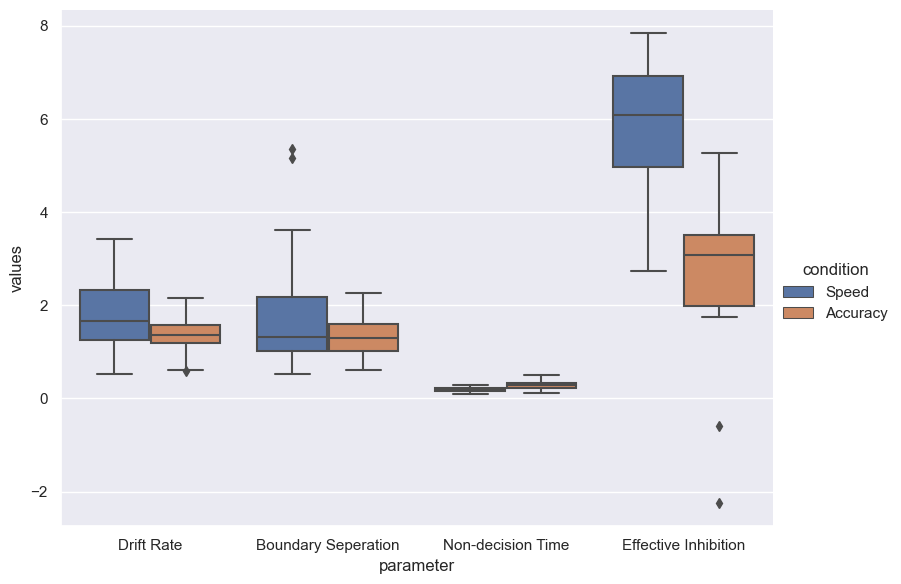

In [125]:
sns.catplot(data=df_SAT, x="parameter", y="values", hue="condition", kind="box",
            height=6, aspect=8/6)


In [120]:
import scipy

In [127]:
scipy.stats.ttest_rel(par_fitted_A[:,1], par_fitted_B[:,1])

Ttest_relResult(statistic=1.7082398176604368, pvalue=0.10387851697464259)